## GRIP : The Sparks Foundation | June-21 Batch

## Data Science and Business Analytics Intern

## Author : Mohd Bilal Khan

## Task-1 : Prediction Using Supervised Machine Learning

In this task it is required to predicted the percentage of students on the bases of number of hours studied using Linear Regression supervised machine learning algorithm

## STEP 1 : Importing libraries and dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## STEP 2 - Visualizing dataset 

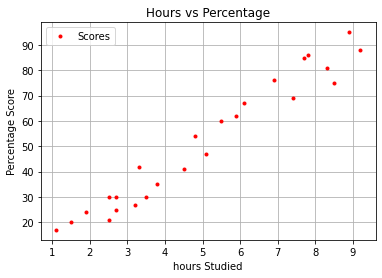

In [5]:
df.plot(x="Hours",y="Scores",style=".",color="red")
plt.title("Hours vs Percentage")
plt.xlabel("hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

#### From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage score. 

In [6]:
# determining the corelation between the variable
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
# to find no of rows and columns
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# finding the statistical values
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [11]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=25, step=1)

## STEP 3 - Data preprocessing and Splitting the dataset

In [13]:
# iloc is used to divide the dataset
X = df.iloc[:,:1].values
y = df.iloc[:,1:].values

In [14]:
#spliting the hours
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
#spliting the Scores
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [16]:
# Splitting data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

## STEP 4 - Training the Algorithm
Data has been splited into training and testing sets

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print("training has been completed")

training has been completed


## STEP 5 - Visualizing model

In [19]:
#Plotting the regression line
line = reg.coef_* X + reg.intercept_

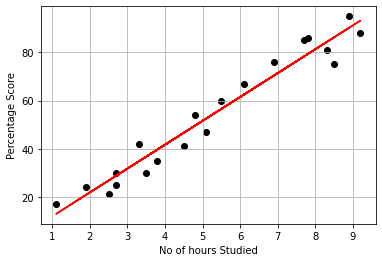

In [20]:
#Plotting for the test data
plt.show()
plt.scatter(X_train,y_train,color="black")
plt.plot(X , line , color = "red")
plt.xlabel("No of hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

## STEP 6 - Making Predictions
Making predictions from our model

In [21]:
print(X_test)
y_pred = reg.predict(X_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Comparing Actual vs Predicted
data = {'Actual': [y_test],'Predicted': [y_pred]}
df= pd.DataFrame.from_dict(data)
df

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [23]:
# You can also test with your oen data
hours = 9.25
own_pred = reg.predict([[hours]])
print("number of hours = {}".format(hours))
print("predicted score= {}".format(own_pred[0]))

number of hours = 9.25
predicted score= [93.69173249]


## STEP 7 - Evaluation the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [24]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
